<a href="https://colab.research.google.com/github/siddhi5386/Emotion-Recognition-from-brain-EEG-signals-/blob/master/emotion%20recognition%20by%20lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:

!pip install git+https://github.com/forrestbao/pyeeg.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-ue75hmmw
  Running command git clone -q https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-ue75hmmw


In [10]:
import numpy as np
import pyeeg as pe
import pickle as pickle
import pandas as pd
import math

from sklearn import svm
from sklearn.preprocessing import normalize

import os
import time

In [11]:

import pandas as pd
import keras.backend as K
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical 
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import Model
import timeit
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution1D, MaxPooling1D, ZeroPadding1D
from keras.optimizers import SGD
#import cv2, numpy as np
import warnings
warnings.filterwarnings('ignore')

In [12]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [13]:
os.getcwd()
os.chdir('/content/drive/My Drive')

In [14]:
channel = [1,2,3,4,6,11,13,17,19,20,21,25,29,31] #14 Channels chosen to fit Emotiv Epoch+
band = [4,8,12,16,25,45] #5 bands
window_size = 256 #Averaging band power of 2 sec
step_size = 16 #Each 0.125 sec update once
sample_rate = 128 #Sampling rate of 128 Hz
subjectList = ['01','02','03']
#List of subjects

# Fast Fourier Transformation to Extract Features
Run only once for all models

In [15]:
# def FFT_Processing (sub, channel, band, window_size, step_size, sample_rate):
#     '''
#     arguments:  string subject
#                 list channel indice
#                 list band
#                 int window size for FFT
#                 int step size for FFT
#                 int sample rate for FFT
#     return:     void
#     '''
#     meta = []
#     with open("/content/drive/My Drive/DEAP/results/dat/s" + sub + '.dat', 'rb') as file:

#         subject = pickle.load(file, encoding='latin1') #resolve the python 2 data problem by encoding : latin1

#         for i in range (0,40):
#             # loop over 0-39 trails
#             data = subject["data"][i]
#             labels = subject["labels"][i]
#             start = 0;

#             while start + window_size < data.shape[1]:
#                 meta_array = []
#                 meta_data = [] #meta vector for analysis
#                 for j in channel:
#                     X = data[j][start : start + window_size] #Slice raw data over 2 sec, at interval of 0.125 sec
#                     Y = pe.bin_power(X, band, sample_rate) #FFT over 2 sec of channel j, in seq of theta, alpha, low beta, high beta, gamma
#                     meta_data = meta_data + list(Y[0])

#                 meta_array.append(np.array(meta_data))
#                 meta_array.append(labels)

#                 meta.append(np.array(meta_array))    
#                 start = start + step_size
                
#         meta = np.array(meta)
#         np.save('/content/drive/My Drive/DEAP/results/dat/s' + sub, meta, allow_pickle=True, fix_imports=True)

In [16]:
# for subjects in subjectList:
#     FFT_Processing (subjects, channel, band, window_size, step_size, sample_rate)

# Split data into training, testing and validating sets
# saved to respective .npy files

In [17]:

# data_training = []
# label_training = []
# data_testing = []
# label_testing = []
# data_validating = []
# label_validating = []

# for subjects in subjectList:

#     with open('/content/drive/My Drive/DEAP/results/dat/s' + subjects + '.npy', 'rb') as file:
#       sub = np.load(file,allow_pickle=True)
#       for i in range (0,sub.shape[0]):
#         if i % 10 == 0:
#           data_validating.append(sub[i][0])
#           label_validating.append(sub[i][1])
#         elif i % 5 == 0:
#           data_testing.append(sub[i][0])
#           label_testing.append(sub[i][1])
#         else:
#           data_training.append(sub[i][0])
#           label_training.append(sub[i][1])

# np.save('/content/drive/My Drive/DEAP/results/data_training_801010', np.array(data_training), allow_pickle=True, fix_imports=True)
# np.save('/content/drive/My Drive/DEAP/results/label_training_801010', np.array(label_training), allow_pickle=True, fix_imports=True)
# print("training dataset:", np.array(data_training).shape, np.array(label_training).shape)

# np.save('/content/drive/My Drive/DEAP/results/data_validating_801010', np.array(data_validating), allow_pickle=True, fix_imports=True)
# np.save('/content/drive/My Drive/DEAP/results/label_validating_801010', np.array(label_validating), allow_pickle=True, fix_imports=True)
# print("validating dataset:", np.array(data_validating).shape, np.array(label_validating).shape)

# np.save('/content/drive/My Drive/DEAP/results/data_testing_801010', np.array(data_testing), allow_pickle=True, fix_imports=True)
# np.save('/content/drive/My Drive/DEAP/results/label_testing_801010', np.array(label_testing), allow_pickle=True, fix_imports=True)
# print("testing dataset:", np.array(data_testing).shape, np.array(label_testing).shape)

# Load training set


In [18]:
with open('/content/drive/My Drive/DEAP/results/data_training_801010.npy', 'rb') as fileTrain:
    X  = np.load(fileTrain)
    
with open('/content/drive/My Drive/DEAP/results/label_training_801010.npy', 'rb') as fileTrainL:
    Y  = np.load(fileTrainL)
    
X = normalize(X)
Z = np.ravel(Y[:, [2]])

Arousal_Train = np.ravel(Y[:, [0]])
Valence_Train = np.ravel(Y[:, [1]])
Domain_Train = np.ravel(Y[:, [2]])
Like_Train = np.ravel(Y[:, [3]])

In [19]:
X.shape

(46848, 70)

In [20]:

from keras.utils import to_categorical
y_train = to_categorical(Z)
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
y_train.shape

(46848, 10)

In [22]:
x_train = np.array(X[:])

# Load testing set

In [23]:

with open('/content/drive/My Drive/DEAP/results/data_testing_801010.npy', 'rb') as fileTrain:
    M  = np.load(fileTrain)
    
with open('/content/drive/My Drive/DEAP/results/label_testing_801010.npy', 'rb') as fileTrainL:
    N  = np.load(fileTrainL)

M = normalize(M)
L = np.ravel(N[:, [2]])

Arousal_Test = np.ravel(N[:, [0]])
Valence_Test = np.ravel(N[:, [1]])
Domain_Test = np.ravel(N[:, [2]])
Like_Test = np.ravel(N[:, [3]])

In [24]:
x_test = np.array(M[:])

In [25]:
from keras.utils import to_categorical
y_test = to_categorical(L)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

# Load validating set

In [27]:
with open('/content/drive/My Drive/DEAP/results/data_validating_801010.npy', 'rb') as fileTrain:
    P  = np.load(fileTrain)
    
with open('/content/drive/My Drive/DEAP/results/label_validating_801010.npy', 'rb') as fileTrainL:
    Q  = np.load(fileTrainL)
    
P = normalize(P)
R = np.ravel(Q[:, [2]])

Arousal_Validate = np.ravel(Q[:, [0]])
Valence_Validate = np.ravel(Q[:, [1]])
Domain_Validate = np.ravel(Q[:, [2]])
Like_Validate = np.ravel(Q[:, [3]])

In [28]:
x_validate = np.array(P[:])

In [29]:
from keras.utils import to_categorical
y_validate = to_categorical(R)
y_validate

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
y_validate.shape

(5856, 10)

# Remove the mean and scale each feature to unit variance

In [31]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_validate = scaler.fit_transform(x_validate)

In [32]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)
x_validate = x_validate.reshape(x_validate.shape[0],x_validate.shape[1], 1)

In [33]:
x_train.shape

(46848, 70, 1)

# Train model

In [34]:

batch_size = 256
num_classes = 10
epochs = 200
input_shape=(x_train.shape[1], 1)

In [35]:

print(input_shape)

(70, 1)


In [36]:
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
from keras.regularizers import l2

In [37]:
  from keras.regularizers import l2
  from keras.layers import Bidirectional
  from keras.layers import LSTM
  from keras.models import Sequential
  from keras import losses

  model = Sequential()
 
  model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=input_shape))
  model.add(Dropout(0.6))

  model.add(LSTM(units = 256, return_sequences = True))  
  model.add(Dropout(0.6))

  model.add(LSTM(units = 64, return_sequences = True))  
  model.add(Dropout(0.6))

  model.add(LSTM(units = 64, return_sequences = True))  
  model.add(Dropout(0.4))

  model.add(LSTM(units = 32))
  model.add(Dropout(0.4))

  model.add(Dense(units = 16))
  model.add(Activation('relu'))

  model.add(Dense(units = num_classes))
  model.add(Activation('softmax'))
  model.compile(optimizer ="adam", loss =losses.categorical_crossentropy,metrics=["accuracy"])
  model.summary()
  m=model.fit(x_train, y_train,epochs=200,batch_size=256,verbose=1,validation_data=(x_validate, y_validate))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 70, 256)          133120    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 70, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 70, 256)           525312    
                                                                 
 dropout_1 (Dropout)         (None, 70, 256)           0         
                                                                 
 lstm_2 (LSTM)               (None, 70, 64)            82176     
                                                                 
 dropout_2 (Dropout)         (None, 70, 64)            0         
                                                        

In [38]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

183/183 [==============================] - 2s 13ms/step - loss: 0.4037 - accuracy: 0.9267
Test loss: 0.403695285320282
Test accuracy: 0.9267417788505554


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


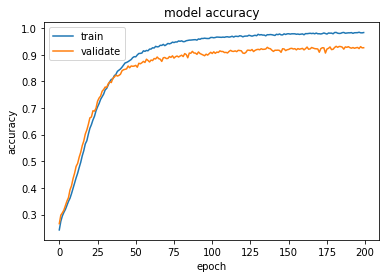

In [39]:
import matplotlib.pyplot as plt
print(m.history.keys())
# summarize history for accuracy
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()


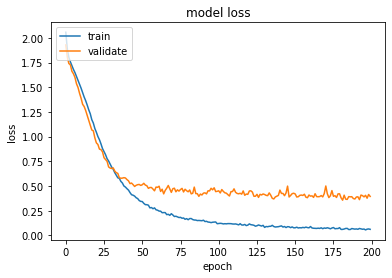

In [40]:
# summarize history for loss
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

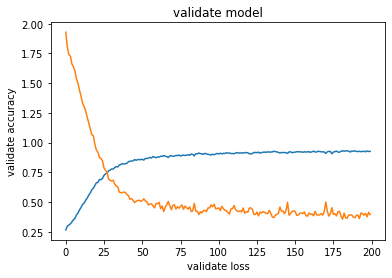

In [41]:
plt.plot(m.history['val_accuracy'])
plt.plot(m.history['val_loss'])
plt.title('validate model')
plt.ylabel('validate accuracy')
plt.xlabel('validate loss')
plt.show()

In [42]:
M=m

183/183 [==============================] - 4s 12ms/step


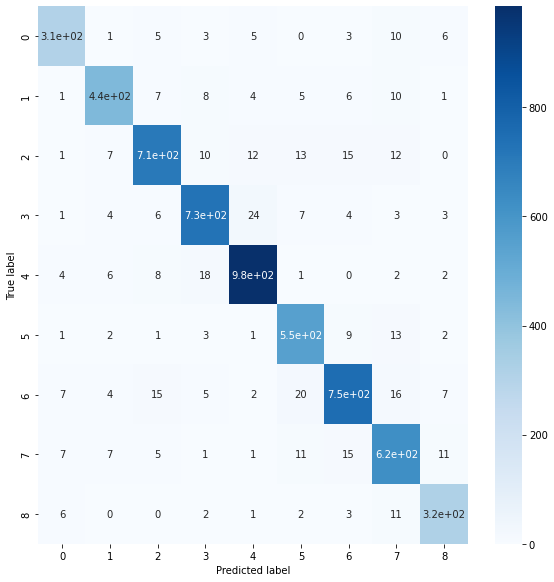

In [43]:
y_pred=model.predict(x_test) 
y_pred=np.argmax(y_pred,axis=1)

# y_pred=model.predict_classes(x_test)
from sklearn.metrics import confusion_matrix
import numpy as np
y_test=np.argmax(y_test, axis=1)
cmatrix=confusion_matrix(y_test, y_pred)
import seaborn as sns
figure = plt.figure(figsize=(8, 8))
sns.heatmap(cmatrix, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [44]:
# Load the library
from tensorflow.keras.models import load_model
# Save the model using TensorFlow SavedModel format
model.save('/content/drive/My Drive/DEAP/LSTM/70_30/fft_lstm_80-10-10_model_domain.h5')